In [1]:
import numpy as np
import cv2
from skimage import feature, measure
import matplotlib.pyplot as plt

# LAB 7 : Watershed Algorithm

In [7]:
def watershed_segmentation(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or could not be opened.")
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Thresholding to obtain a binary image
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations to remove small noise
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Dilate the image to get the sure background
    sure_bg = cv2.dilate(morph, kernel, iterations=3)

    # Find sure foreground area
    dist_transform = cv2.distanceTransform(morph, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Find unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Mark the labels
    markers = cv2.connectedComponents(morph)[1]

    # Add one to all the labels to distinguish between background and foreground
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply watershed
    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]  # Mark the boundaries with red

    plt.figure(figsize=(15, 5))  
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Watershed Segmentation')
    plt.axis('off') 

    plt.subplot(132)  
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Image')
    plt.axis('off') 

    # Display markers as an image for visual confirmation
    markers_display = np.uint8(markers)
    markers_display = cv2.applyColorMap(markers_display * (255 // markers_display.max()), cv2.COLORMAP_JET)

    plt.subplot(133) 
    plt.imshow(markers_display)
    plt.title('Markers')
    plt.axis('off')  #

    plt.tight_layout()  #prevent overlap
    plt.show()

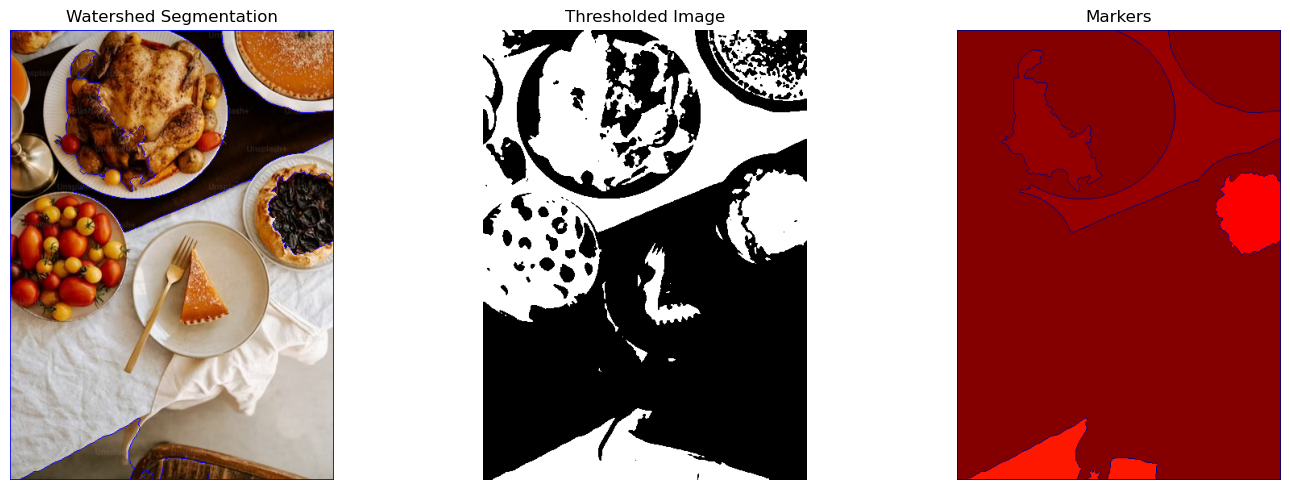

In [9]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\table.jpg"
watershed_segmentation(image_path)

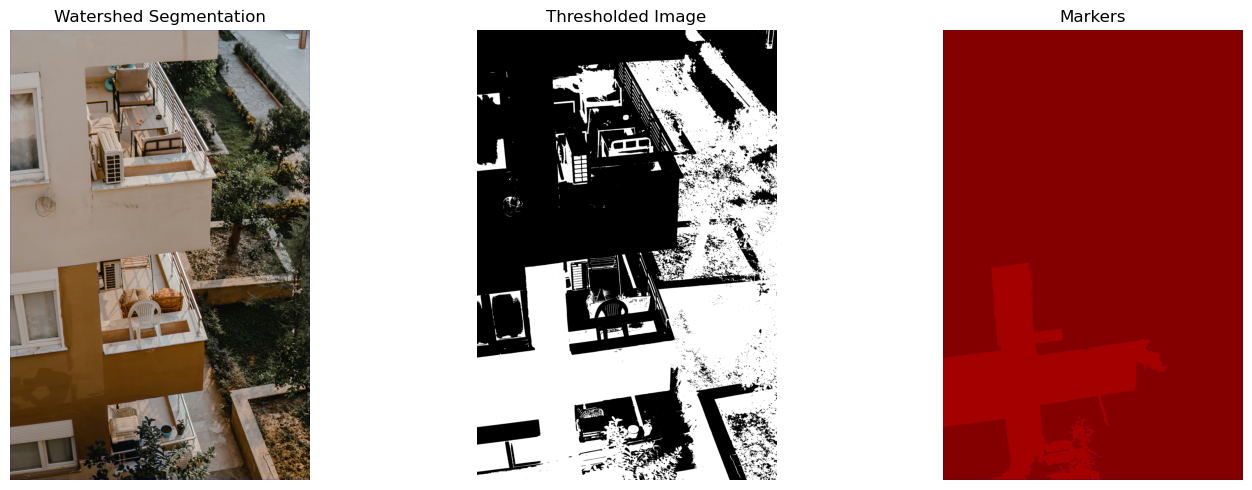

In [11]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\balcony.jpg"
watershed_segmentation(image_path)

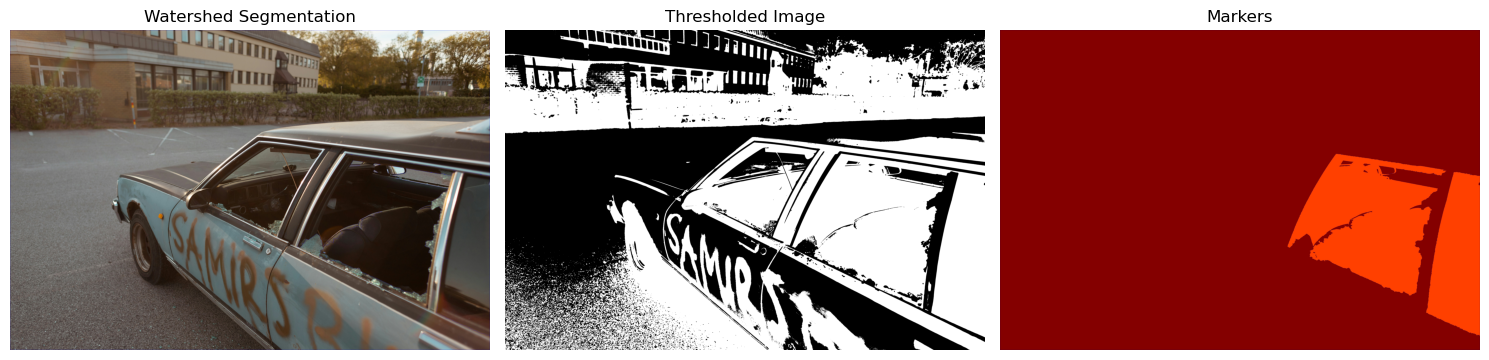

In [13]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\car.jpg"
watershed_segmentation(image_path)

# LAB 8 : GLCM

In [59]:
def compute_glcm_properties(image):
    glcm = feature.graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

    #GLCM properties
    glcm_props = {
        'contrast': feature.graycoprops(glcm, 'contrast')[0, 0],
        'dissimilarity': feature.graycoprops(glcm, 'dissimilarity')[0, 0],
        'homogeneity': feature.graycoprops(glcm, 'homogeneity')[0, 0],
        'energy': feature.graycoprops(glcm, 'energy')[0, 0],
        'correlation': feature.graycoprops(glcm, 'correlation')[0, 0],
    }
    return glcm, glcm_props

In [75]:
def glcm(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Using 'GRAYSCALE' to read as gray
    if image is None:
        raise ValueError("Image not found or could not be opened.")

    glcm, glcm_props = compute_glcm_properties(image)

    # Create GLCM image for visualization
    glcm_image = np.log1p(glcm[:, :, 0, 0])  # Use log to visualize better
    glcm_image = (glcm_image / glcm_image.max() * 255).astype(np.uint8)  # Normalize to 0-255 for display

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')  # Hide axes

    plt.subplot(132)
    plt.imshow(glcm_image, cmap='hot')
    plt.title('GLCM (Log-scaled)')
    plt.axis('off')  # Hide axes

    plt.subplot(133)
    plt.axis('off')  # Hide axes
    plt.title('GLCM Properties')
    for prop, value in glcm_props.items():
        plt.text(0.1, 0.8 - 0.1 * list(glcm_props.keys()).index(prop), f"{prop}: {value:.4f}", fontsize=12)

    plt.tight_layout()
    plt.show()

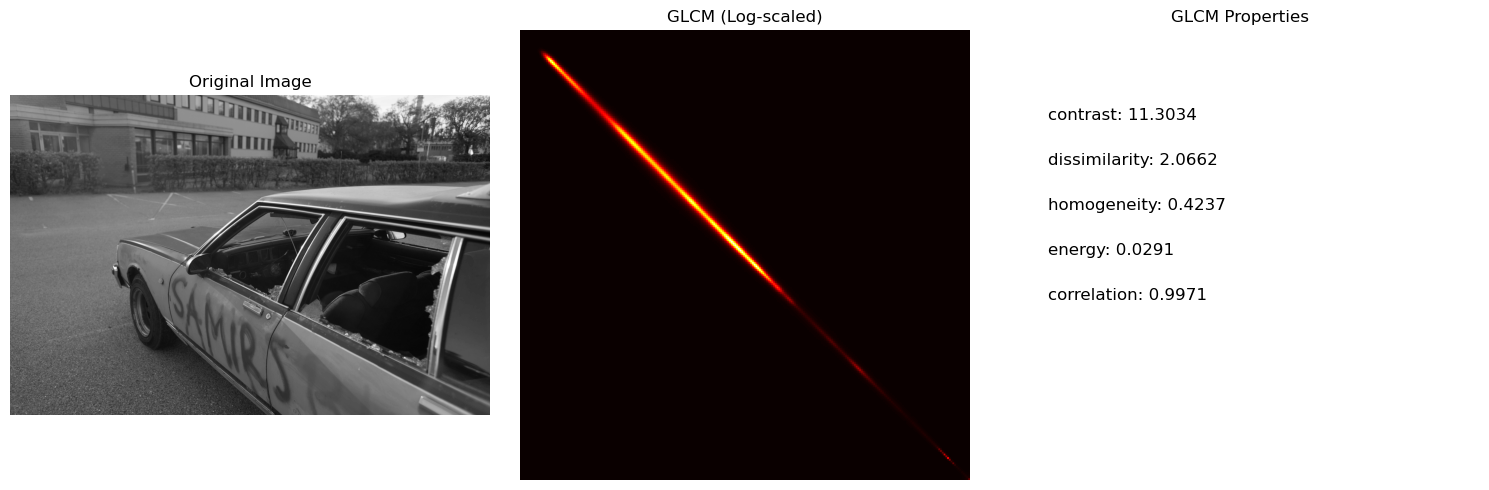

In [73]:
glcm(image_path)

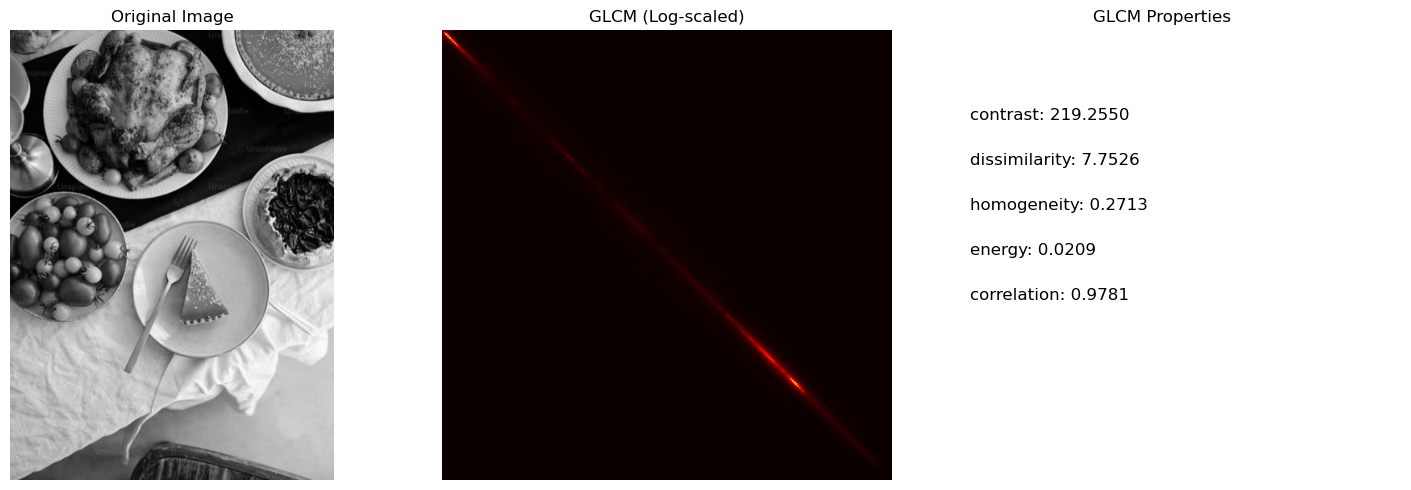

In [77]:
image_path = r"C:\Users\Ashima\Desktop\Q3 2024\MV\table.jpg"
glcm(image_path)